# Loading All the DataSets


In [26]:
import pandas as pd 
vancouver_datasets = pd.read_csv("../datasets/Vancouver_all_crimes.csv")
tor_assault_datasets = pd.read_csv("../datasets/Toronto_Assaults.csv")
tor_break_and_enter = pd.read_csv("../datasets/Toronto_break_and_enter.csv")
tor_homicides = pd.read_csv("../datasets/Toronto_Homicides.csv")

<h2> Cleaning of Vancouver Dataset</h2>


In [27]:
vd = vancouver_datasets.sort_values(by = 'YEAR', ascending=True)
sorted_values = ['Offence Against a Person', 'Homicide', 'Break and Enter Commercial', 'Break and Enter Residential/Other']

vd['CRIMES'] = vd['TYPE']
vd_final = vd[vd['CRIMES'].isin(sorted_values)][['CRIMES', 'YEAR', 'NEIGHBOURHOOD']]


vd_final = vd_final[vd_final['YEAR']!=2025]


vd_final['CRIMES'] = vd_final['CRIMES'].replace({
    'Break and Enter Commercial': 'Break and Enter',
    'Break and Enter Residential/Other': 'Break and Enter',
    'Offence Against a Person' : 'Assault'
})


vd_final


,CRIMES,YEAR,NEIGHBOURHOOD
57420,Break and Enter,2003,Fairview
57429,Break and Enter,2003,Fairview
57436,Break and Enter,2003,Fairview
57437,Break and Enter,2003,Fairview
57438,Break and Enter,2003,Fairview
...,...,...,...
267824,Assault,2024,Central Business District
267823,Assault,2024,Central Business District
45165,Break and Enter,2024,Marpole
267820,Assault,2024,Central Business District


<h2>Cleaning of Toronto Dataset</h2>

In [28]:
import pandas as pd
#fulfilling the first merge successfully
toronto_first_merge = pd.concat([tor_assault_datasets, tor_break_and_enter], axis=0)
toronto_first_merge['MERGED_CRIMES'] = toronto_first_merge['MCI_CATEGORY'].combine_first(toronto_first_merge['OFFENCE'])
toronto_first_clean = toronto_first_merge.drop(columns = ['MCI_CATEGORY', 'OFFENCE'])

toronto_first_clean.dropna()
#the second cleaning with toronto_homicides
toronto_second_merge = pd.concat([toronto_first_clean, tor_homicides], axis = 0)
toronto_second_merge['CRIMES'] = toronto_second_merge['MERGED_CRIMES'].combine_first(toronto_second_merge['HOMICIDE_TYPE'])


toronto_dataset = toronto_second_merge.drop(columns= ['MERGED_CRIMES', 'HOMICIDE_TYPE'])
toronto_dataset['NEIGHBOURHOOD'] = toronto_dataset['NEIGHBOURHOOD_158']
toronto_dataset['YEAR'] = toronto_dataset['OCC_YEAR'].fillna(0).astype(int)

toronto_dataset['CRIMES'] = toronto_dataset['CRIMES'].replace({
    'Shooting': 'Homicide',
    'Stabbing': 'Homicide',
})

toronto_dataset = toronto_dataset[~toronto_dataset['CRIMES'].isin(['Other'])]

toronto_dataset = toronto_dataset[['CRIMES', 'YEAR', 'NEIGHBOURHOOD']]
toronto_dataset


,CRIMES,YEAR,NEIGHBOURHOOD
0,Assault,2014,Corso Italia-Davenport (92)
1,Assault,2014,Lawrence Park North (105)
2,Assault,2014,Palmerston-Little Italy (80)
3,Assault,2013,Wellington Place (164)
4,Assault,2014,West Rouge (143)
...,...,...,...
1476,Homicide,2024,Blake-Jones (69)
1477,Homicide,2024,Englemount-Lawrence (32)
1478,Homicide,2024,Scarborough Village (139)
1479,Homicide,2024,Corso Italia-Davenport (92)


<h2>Visualizing Trends Over Time For Various Types of Vancouver Crimes</h2>

<Figure size 1400x800 with 0 Axes>

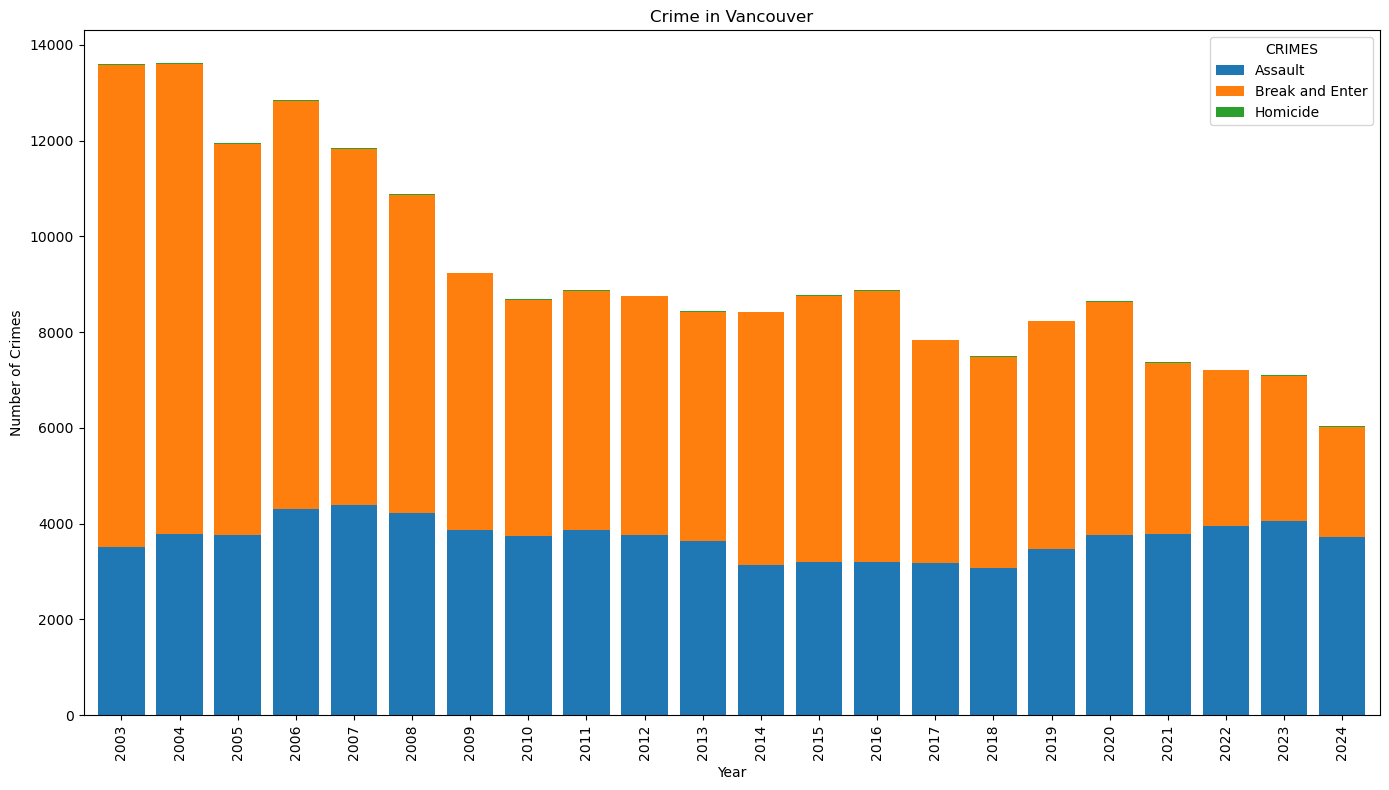

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by year and crime type
vd_grouped = vd_final.groupby(['YEAR', 'CRIMES']).size().unstack().fillna(0)

# Plot Vancouver crime data
plt.figure(figsize=(14, 8))
vd_grouped.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Vancouver')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()



<h2>Visualizing Trends Over Time For Various Types of Toronto Crimes</h2>

<Figure size 1400x800 with 0 Axes>

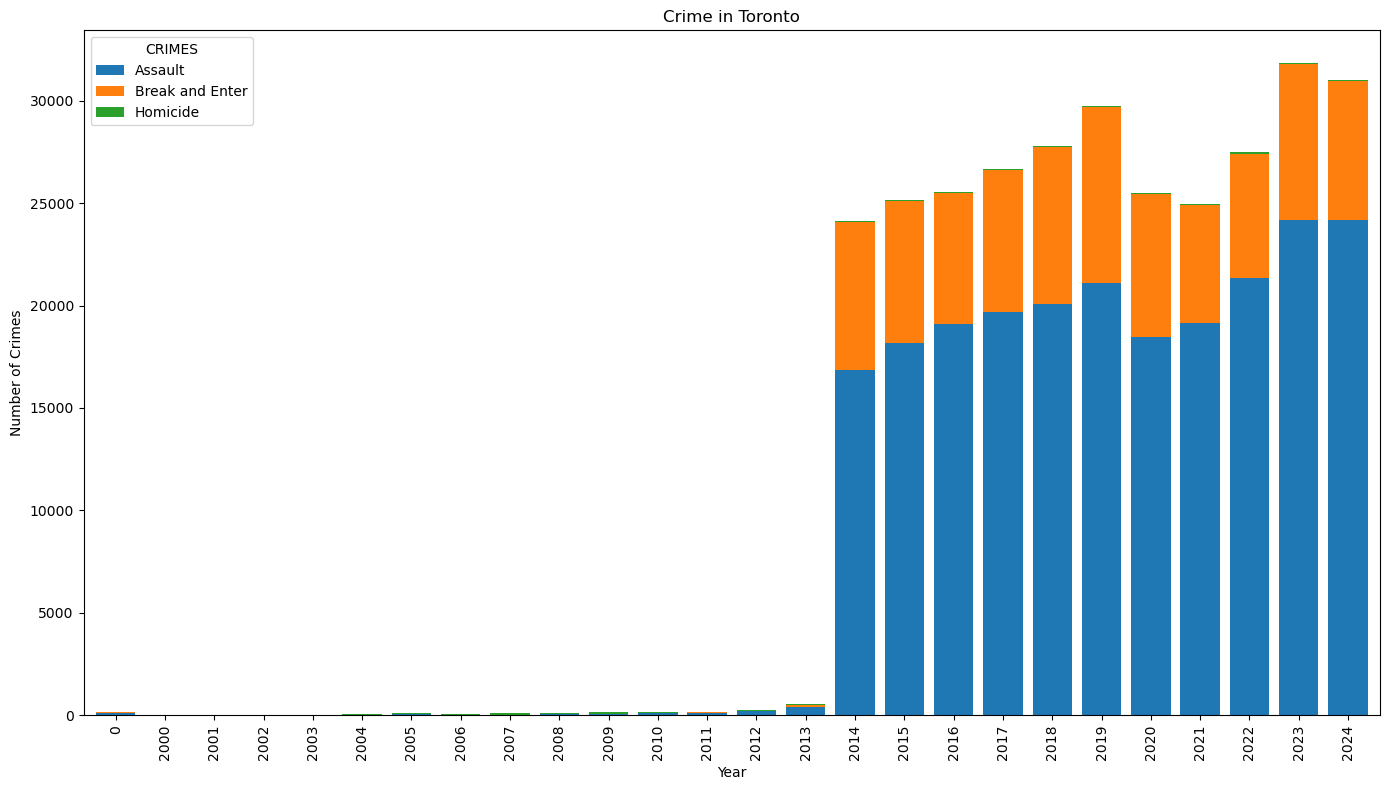

In [30]:
import matplotlib.pyplot as plt

toronto_grouped = toronto_dataset.groupby(['YEAR', 'CRIMES']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
toronto_grouped.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Toronto')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()


<h2>Identifying Toronto zones with higher or lower crime rates </h2>

In [31]:
def zone(neighbourhood):
    if any(keyword in neighbourhood for keyword in ['Agincourt', 'Malvern', 'Bendale', 'Birchcliffe', 'Scarborough', 'Cliffside']):
        return 'Scarborough'
    elif any(keyword in neighbourhood for keyword in ['Alderwood', 'Humber', 'Rexdale', 'Islington', 'Etobicoke', 'Kingsview']):
        return 'Etobicoke'
    elif any(keyword in neighbourhood for keyword in ['Bathurst', 'Bayview', 'Don Mills', 'York Mills', 'Downsview', 'North York']):
        return 'North York'
    elif any(keyword in neighbourhood for keyword in ['Annex', 'Church-Wellesley', 'Bay-Cloverhill', 'Cabbagetown', 'Kensington', 'Downtown']):
        return 'Downtown'
    elif any(keyword in neighbourhood for keyword in ['Broadview', 'Danforth', 'Leaside', 'East York', 'Coxwell']):
        return 'East York'
    else:
        return 'Other'

toronto_dataset['ZONE'] = toronto_dataset['NEIGHBOURHOOD'].apply(zone)

toronto_crime_by_zone = toronto_dataset.groupby(['ZONE', 'CRIMES']).size().unstack().fillna(0).astype(int)

toronto_crime_by_zone



CRIMES,Assault,Break and Enter,Homicide
ZONE,,,
Downtown,20006,6775,54
East York,7678,3040,36
Etobicoke,15098,6136,123
North York,5110,2784,27
Other,163758,54818,805
Scarborough,11968,3476,66


<h2>Identifying Vancouver zones with higher or lower crime rates </h2>

In [32]:
def vancouver_zone(neighbourhood):
    if neighbourhood in ['Central Business District', 'West End', 'Stanley Park']:
        return 'Downtown'
    elif neighbourhood in ['Kitsilano', 'Dunbar-Southlands', 'Arbutus Ridge', 'Shaughnessy', 'Kerrisdale', 'West Point Grey']:
        return 'West Side'
    elif neighbourhood in ['Grandview-Woodland', 'Hastings-Sunrise', 'Renfrew-Collingwood', 'Strathcona', 'Kensington-Cedar Cottage']:
        return 'East Vancouver'
    elif neighbourhood in ['Sunset', 'Victoria-Fraserview', 'Marpole', 'Killarney', 'Oakridge', 'South Cambie', 'Musqueam']:
        return 'South Vancouver'
    else:
        return 'Other'
    
vd_final.loc[:, 'ZONE'] = vd_final['NEIGHBOURHOOD'].apply(vancouver_zone)

vancouver_filtered = vd_final[['CRIMES', 'YEAR', 'ZONE']]

vancouver_crime_by_zone = vancouver_filtered.groupby(['ZONE', 'CRIMES']).size().unstack().fillna(0).astype(int)

vancouver_crime_by_zone



CRIMES,Assault,Break and Enter,Homicide
ZONE,,,
Downtown,33919,26708,95
East Vancouver,27288,33211,124
Other,7552,21679,31
South Vancouver,8685,20691,60
West Side,3943,20783,19


<h2> Visualizing Crimes in Toronto Based On Zones </h2>

<Figure size 1400x800 with 0 Axes>

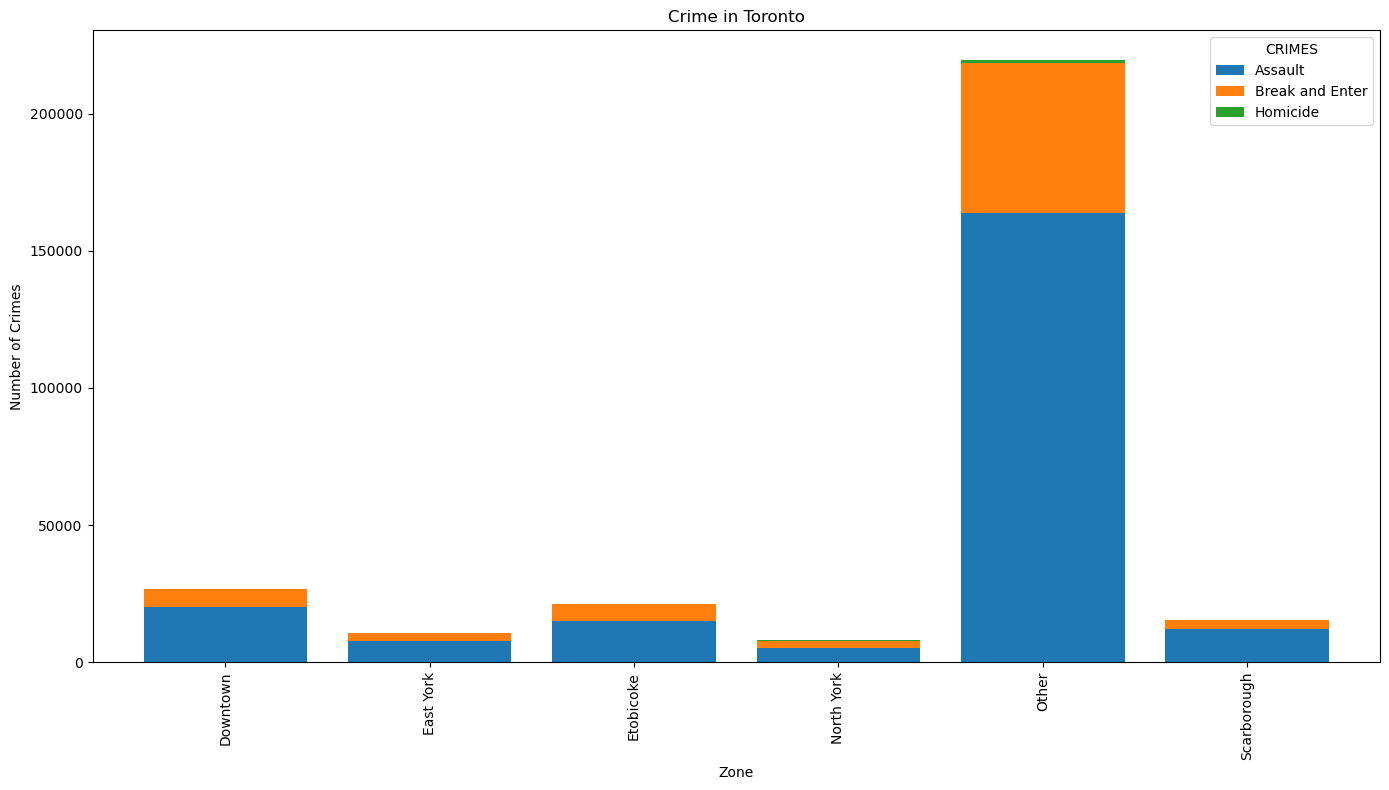

In [33]:
toronto_dataset['ZONE'] = toronto_dataset['NEIGHBOURHOOD'].apply(zone)
toronto_dataset['ZONE'] = toronto_dataset['NEIGHBOURHOOD'].apply(zone)
toronto_crime_by_zone = toronto_dataset.groupby(['ZONE', 'CRIMES']).size().unstack().fillna(0).astype(int)

plt.figure(figsize=(14, 8))
toronto_crime_by_zone.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Toronto')
plt.xlabel('Zone')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

<h2>Visualizing Crimes in Vancouver Based On Zones</h2>

<Figure size 1400x800 with 0 Axes>

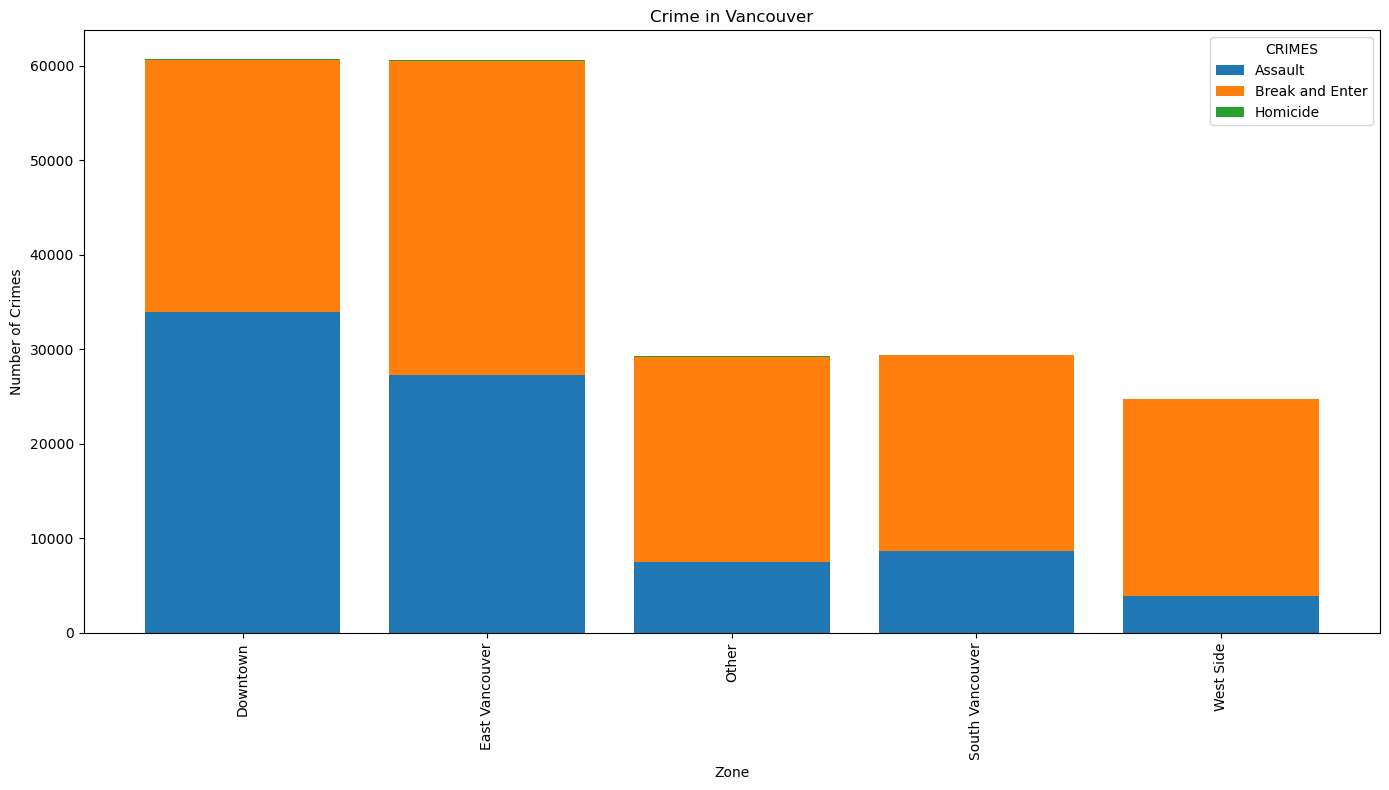

In [34]:
vd_final.loc[:, 'ZONE'] = vd_final['NEIGHBOURHOOD'].apply(vancouver_zone)

vancouver_filtered = vd_final[['CRIMES', 'YEAR', 'ZONE']]

vancouver_crime_by_zone = vancouver_filtered.groupby(['ZONE', 'CRIMES']).size().unstack().fillna(0).astype(int)
plt.figure(figsize=(14, 8))
vancouver_crime_by_zone.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Vancouver')
plt.xlabel('Zone')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()